In [22]:
!pip install invisible_watermark transformers accelerate safetensors
!pip install -U autotrain-advanced

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 44.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of datasets[vision] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


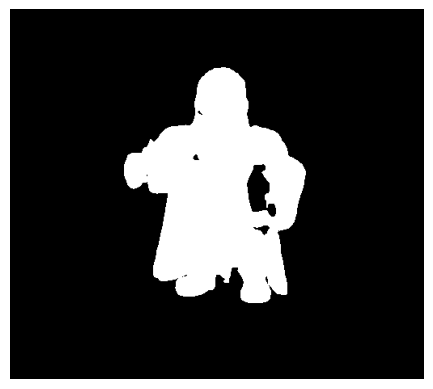

In [1]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

# Load model
processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

# Load image
image_path = '/content/cropped_IMG-20240908-WA0061.jpg'
image = Image.open(image_path)
inputs = processor(images=image, return_tensors="pt")

# Perform inference
outputs = model(**inputs)
logits = outputs.logits.cpu()

# Upsample the logits to match the image size
upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

# Get the predicted segmentation mask
pred_seg = upsampled_logits.argmax(dim=1)[0]

# Create a mask where label 0 (background) and label 11 (face) are set to 0 (black), everything else is 1 (white)
black_labels = [0]  # List of labels that should be black
bw_image = np.where(np.isin(pred_seg.numpy(), black_labels), 0, 255).astype(np.uint8)

# Create a PIL image from the numpy array
bw_pil_image = Image.fromarray(bw_image)

# Display the black and white image
plt.imshow(bw_pil_image, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

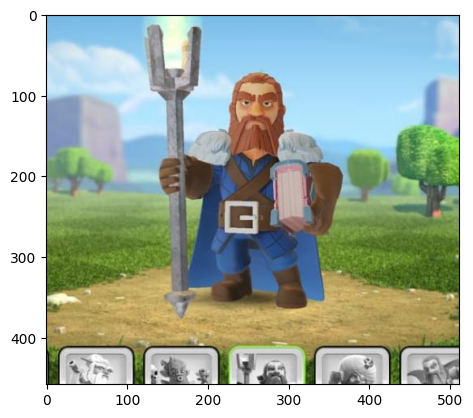

In [13]:
image_path = '/content/cropped_IMG-20240908-WA0061.jpg'
image = Image.open(image_path)
plt.imshow(image)

In [ ]:
# import torch
# from diffusers import StableDiffusionXLImg2ImgPipeline
# from diffusers.utils import load_image

# pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
#     "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
# )
# pipe = pipe.to("cuda")
# image_path = '/content/cropped_IMG-20240908-WA0061.jpg'

# init_image = Image.open(image_path).convert("RGB")
# prompt = "a photo of a game character in robotic theme "
# image = pipe(prompt, image=init_image).images


model_index.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/4.52G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
# prompt = "Jungle Theme"
# #image and mask_image should be PIL images.
# image_path = '/content/cropped_IMG-20240908-WA0061.jpg'
# image = Image.open(image_path).convert("RGB")
# #mask_image = bw_pil_image
# #The mask structure is white for inpainting and black for keeping as is
# image = pipe(prompt=prompt, image=image, mask_image=bw_pil_image).images[0]
# image.save("./try1.png")

  0%|          | 0/50 [00:00<?, ?it/s]

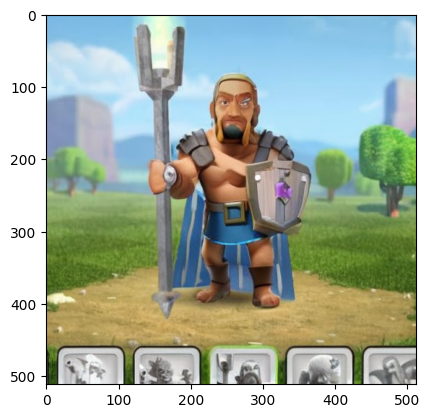

In [ ]:
# img_path = '/content/try1.png'
# plt.imshow(Image.open(img_path))

In [2]:
!pip install transformers accelerate diffusers
from diffusers import StableDiffusionControlNetInpaintPipeline, ControlNetModel,  DDIMScheduler
from diffusers.utils import load_image
import numpy as np
import torch
image_path = '/content/cropped_IMG-20240908-WA0061.jpg'
init_image = Image.open(image_path).convert("RGB")
init_image = init_image.resize((512, 512))

generator = torch.Generator(device="cpu").manual_seed(1)

mask_image = bw_pil_image
mask_image = mask_image.resize((512, 512))


def make_inpaint_condition(image, image_mask):
    image = np.array(image.convert("RGB")).astype(np.float32) / 255.0
    image_mask = np.array(image_mask.convert("L")).astype(np.float32) / 255.0

    assert image.shape[0:1] == image_mask.shape[0:1], "image and image_mask must have the same image size"
    image[image_mask > 0.5] = -1.0  # set as masked pixel
    image = np.expand_dims(image, 0).transpose(0, 3, 1, 2)
    image = torch.from_numpy(image)
    return image


control_image = make_inpaint_condition(init_image, mask_image)


In [3]:
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/control_v11p_sd15_inpaint", torch_dtype=torch.float16
)
pipe = StableDiffusionControlNetInpaintPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", controlnet=controlnet, torch_dtype=torch.float16
)
pipe.to("cuda")
pipe.load_lora_weights("/content/pytorch_lora_weights (1).safetensors")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [28]:
image = pipe(
    "Clash of clans Grand Warden Wizard",
    num_inference_steps=20,
    generator=generator,
    eta=1.0,
    image=init_image,
    mask_image=mask_image,
    control_image=control_image,
).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

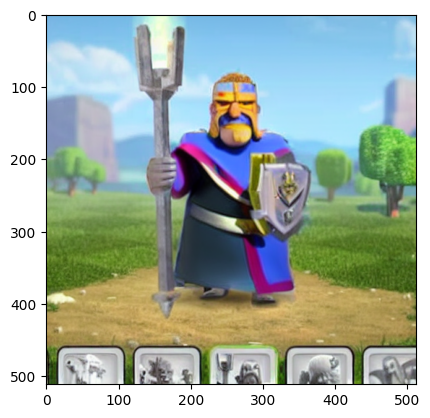

In [29]:
plt.imshow(image)